<a href="https://colab.research.google.com/github/rajatpal00/-ABTN0104--IPL-T20-Cricket-Analysis-/blob/main/Rajat_Kr_Pal_24_02_2021_%5BABTN0104%5D_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

The IPL is the most-attended cricket league in the world and in 2014 was ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube. The brand value of the IPL in 2019 was ₹475 billion  to the GDP of the Indian economy.

On 13 September 2007, the BCCI announced the launch of a franchise-based Twenty20 cricket competition called Indian Premier League whose first season was slated to start in April 2008, in a "high-profile ceremony" in New Delhi. BCCI vice-president Lalit Modi, said to be the mastermind behind the idea of the IPL, spelled out the details of the tournament including its format, the prize money, franchise revenue system and squad composition rules. It was also revealed that the IPL would be run by a seven-man governing council composed of former India players and BCCI officials and that the top two teams of the IPL would qualify for that year's Champions League Twenty20. Modi also clarified that they had been working on the idea for two years and that the IPL was not started as a "knee-jerk reaction" to the ICL. The league's format was similar to that of the Premier League of England and the NBA in the United States.

In order to decide the owners for the new league, an auction was held on 24 January 2008 with the total base prices of the franchises costing around      4 million. At the end of the auction, the winning bidders were announced, as well as the cities the teams would be based in:  Hyderabad, Jaipur, KolkatMumbai. In the end, the franchises  were all sold for a total of  $723.59 million. The Indian Cricket League soon folded in 2008. (Scource - https://en.wikipedia.org/wiki/Indian_Premier_League)

Lets start this project by exploring the Data and extracting the usefull information from the dataset which we have 

lets us import the data in the colabnotebook first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']= (20,10)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This is deliveries data set which give as information about each bowl which have been bowled in ipl so far in IPL,


In [3]:
path = '/content/drive/MyDrive/AlmaBetter/capstone project/[ABTN0104] IPL T20 CRICKET/IPL DATA/'
deliveries_df = pd.read_csv(path + "deliveries.csv")

In [4]:
deliveries_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [5]:
# by this we try to find out the sanity of the data set.
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

while exploring the data by using info function we cab say the most of the columns are present with values but there are few columns like player_dismissed which have some values in that

**Lets see what information does matches data frame holds** 

In [6]:
matches_df_1 = pd.read_csv(path + "matches.csv")
matches_df_1.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
matches_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

While exploring matches Dataframe we came across that there are 4 null values for column winner, player _of_match


 Lets see what is reason for that

In [8]:
# we are looking for all row values in winner column which have null value
matches_df_1[matches_df_1["winner"].isna()]



,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


so from this we can conclude that on these day the match has no result that could be possible due to rain or any other failure.

**Now we will finding out the team which have won max number of matches in ipl so far**

In [9]:
# this can we found by using value_counts function on winner column
# converting the pandaserise into dataframe for better representation 
team_by_win = pd.DataFrame(matches_df_1['winner'].value_counts())

#lets reset the index
team_by_win.reset_index(inplace= True)
team_by_win.rename(columns ={"index":"Team Name","winner":"matches_Won"},inplace =True)


# tried to set the background color on the basis of numerical value present by using background _gradient 
team_by_win.style.background_gradient(cmap="PuBu")

,Team Name,matches_Won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


From this data we can conclude that  mumbai indian is the team which have won max number of matches

By looking this Dataframe any one can thinks  that there are 14 teams in IPL


But that is not correct as there are few teams which have rename them self 

*   Delhi Daredevils becomes  Delhi Capitals
*   Deccan Chargers become  Sunrisers Hyderabad
*   Rising Pune Supergiants becomes Rising Pune Supergiant

And few teams have played for only one or two season



*   Gujarat Lions
*	  Pune Warriors

*   Rising Pune Supergiant
*   Kochi Tuskers Kerala













Now lets change the replace the name of the team and see how this dataframe changes 

In [10]:
# using replace function to replace value to another
matches_df= matches_df_1.replace(to_replace="Delhi Daredevils", value ="Delhi Capitals")
matches_df.replace(to_replace="Deccan Chargers", value ="Sunrisers Hyderabad",inplace =True)
matches_df.replace(to_replace="Rising Pune Supergiants", value ="Rising Pune Supergiant",inplace =True)

In [11]:
matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [12]:
team_by_win_1 = pd.DataFrame(matches_df['winner'].value_counts())
team_by_win_1.reset_index(inplace= True)
team_by_win_1.rename(columns ={"index":"Team Name","winner":"matches_won"},inplace =True)


# tried to set the background color on the basis of numerical value present by using background _gradient 
team_by_win_1.style.background_gradient(cmap="PuBu")


,Team Name,matches_won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Sunrisers Hyderabad,87
4,Royal Challengers Bangalore,84
5,Kings XI Punjab,82
6,Delhi Capitals,77
7,Rajasthan Royals,75
8,Rising Pune Supergiant,15
9,Gujarat Lions,13


**We can plot a Pie chart for Top 8 teams in Ipl**


Text(0.5, 1.0, 'Win percentage of 8 Team in IPL')

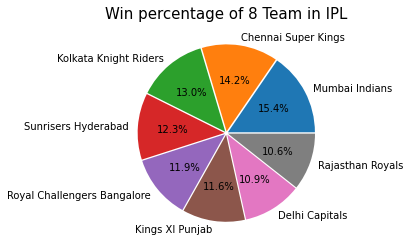

In [13]:
# lets plot a pie plot

plt.pie(team_by_win_1.loc[0:7,"matches_won"], autopct="%.1f%%", explode = [0.02]*8,labels= team_by_win_1.loc[0:7,"Team Name"], )
# giving title to the pie chart and changing fontsize
plt.title("Win percentage of 8 Team in IPL",fontsize=15)


**Do u want to know which Team have got maximun number of orange cap holder**

In [14]:
#let us start by making a new dataframe with only two columns of matches dataframe which can be merged with deliveries data frame  
new_match_df = matches_df[["id",'Season']]
new_match_df

,id,Season
0,1,IPL-2017
1,2,IPL-2017
2,3,IPL-2017
3,4,IPL-2017
4,5,IPL-2017
...,...,...
751,11347,IPL-2019
752,11412,IPL-2019
753,11413,IPL-2019
754,11414,IPL-2019


In [15]:
#using merge operation  on the match id columns of deliveries dataframe and id column of new_matches_df dataframe
new_deliveries_df = pd.merge(deliveries_df,new_match_df , left_on= "match_id",right_on ="id")

In [16]:
new_deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,Season
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,IPL-2017
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,IPL-2017
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,IPL-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,11415,IPL-2019
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,11415,IPL-2019
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,11415,IPL-2019
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,11415,IPL-2019


In [17]:
new_deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

Now we can use group by function get deliveries bowled in each ipl season

In [18]:
ipl_season = new_deliveries_df.groupby("Season")

Lets make a Function which takes ipl season as argument and return orange cap holder of that Seasonr

In [19]:
def get_orange_cap(season):
  season = season.upper()
  s= ipl_season.get_group(season)
  max_runs = s.groupby(["batsman"])["batsman_runs"].sum().sort_values(ascending =False).reset_index()
  # print(max_runs)
  # print(s)
  top_scores= max_runs.loc[0,"batsman"]
  runs = max_runs.loc[0,"batsman_runs"]
  team_name = s[s["batsman"]==top_scores]["batting_team"][0]
  print(team_name)
  

In [20]:
get_orange_cap("IPL-2017")

Sunrisers Hyderabad


We can also find the top scorer in each season by using group by function


In [21]:
# lets make a empty list which will be helpfull in making dataframe
orange_cap =[]

# Group by objects can be itaterd to get the datframe of each groupby

for season ,season_df in ipl_season:
  # season represent the name by which of group by has been done
  # season_df will give dataframe object with respect to that name

  # we are again performing group by on the season dataframe to group this datframe with batsman 
  max_runs = season_df.groupby(["batsman"])["batsman_runs"].sum().sort_values(ascending =False).reset_index()
  # print(season)
  # print(max_runs)
  
  # find the top scorer from the recent created datframe
  top_scores= max_runs.loc[0,"batsman"]

  # sruns scored by that batsman
  runs = max_runs.loc[0,"batsman_runs"]

  # we also found the team which he belongs to
  team_name = season_df[season_df["batsman"]==top_scores]["batting_team"].iloc[0]
  # print(team_name)

  # then we store all this data in dictionary
  dict_ ={"season":season,"Team":team_name,"Batsman":top_scores,"Runs":runs}

  # now we append this dictinary in the list
  orange_cap.append(dict_)
    # now oarnge cap list conatain dictinaries



**Now we have created a dataframe  with the us eof list, which contain highest run getter from all season**

In [22]:
# makinhg dataframe from list
orange_cap_df = pd.DataFrame(orange_cap)

# using background gradient to color on basis of highest values 
orange_cap_df.style.background_gradient(cmap="Blues")

,season,Team,Batsman,Runs
0,IPL-2008,Kings XI Punjab,SE Marsh,616
1,IPL-2009,Chennai Super Kings,ML Hayden,572
2,IPL-2010,Mumbai Indians,SR Tendulkar,618
3,IPL-2011,Royal Challengers Bangalore,CH Gayle,608
4,IPL-2012,Royal Challengers Bangalore,CH Gayle,733
5,IPL-2013,Chennai Super Kings,MEK Hussey,733
6,IPL-2014,Kolkata Knight Riders,RV Uthappa,660
7,IPL-2015,Sunrisers Hyderabad,DA Warner,562
8,IPL-2016,Royal Challengers Bangalore,V Kohli,973
9,IPL-2017,Sunrisers Hyderabad,DA Warner,641


**Now by ploting the scatter gragh we can see which team has maximum orange cap holder**

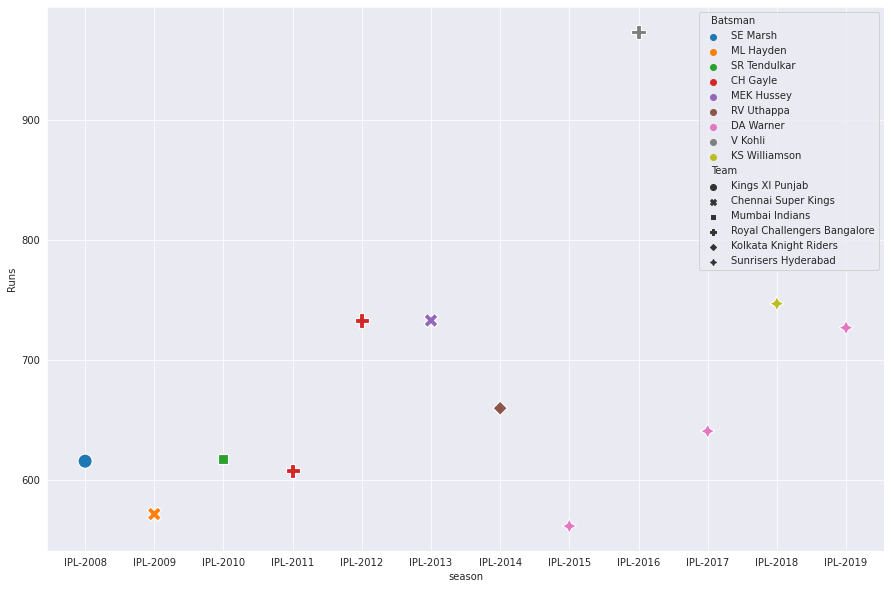

In [131]:
# use rcParam to fix the size of the plot
plt.rcParams['figure.figsize']= (15,10)
sns.set_style("darkgrid")

# used scattered plot to plot to plot the data with the use of hue and style
sns.scatterplot(data=orange_cap_df,x="season",y="Runs",hue ="Batsman",s=200,style="Team")



*ohhh by looking in the graph we can see that Sunriser Hyderabad is consistently  having the highest scorer in their team from last 3 IPL season*

**Lets explore this data more  and find out how overs play a crucial role in T20**

In [24]:
#creating a function which will return a flaot value of wicket which can be usefull for us
def get_wicket(dismisal):
  if dismisal  :
    return 1
 


In [25]:
deliveries_df["wicket"] = deliveries_df[~deliveries_df['player_dismissed'].isna()]["player_dismissed"].apply(get_wicket)
deliveries_df[~deliveries_df["wicket"].isna()].head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,wicket
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh,1.0
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,0,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby,1.0


In [26]:


deliveries_df[deliveries_df['is_super_over']!=0].tail(2)
# by exploring we find out it will have only one over which is bowled that will create wrong information about the data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,wicket
127368,536,4,Rajasthan Royals,Kings XI Punjab,1,3,SPD Smith,JP Faulkner,MG Johnson,1,0,0,0,0,0,1,0,1,NaN,NaN,NaN,NaN
127369,536,4,Rajasthan Royals,Kings XI Punjab,1,4,JP Faulkner,SPD Smith,MG Johnson,1,0,0,0,0,0,0,0,0,JP Faulkner,run out,NaN,1.0


In [73]:
# we are going to remove the data of superover as we are more focused on matches overs
wicketper_over_df_1 = deliveries_df.groupby("over").sum().reset_index()
wicketper_over_df_1

,over,match_id,inning,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,wicket
0,1,17111970,14598,35259,81,539,52,248,32,0,8535,871,9406,306.0
1,2,16735202,14248,34880,0,489,40,262,32,0,10139,823,10962,350.0
2,3,16764234,14122,34273,0,392,42,231,40,0,11413,705,12118,371.0
3,4,16678664,14062,34004,0,340,22,230,46,0,11769,638,12407,385.0
4,5,16621283,13997,33794,0,322,32,177,34,5,11856,570,12426,385.0
5,6,16492607,13966,33754,0,332,41,227,47,0,11865,647,12512,380.0
6,7,16450119,13895,33525,0,362,22,200,23,0,9476,607,10083,308.0
7,8,16434386,13858,33317,0,300,22,173,27,0,10215,522,10737,324.0
8,9,16431313,13814,33289,0,295,44,172,20,0,10596,531,11127,369.0
9,10,16480392,13728,32966,0,269,57,153,24,0,10484,503,10987,338.0


***Now  with the help of seaborn heatmap lets find out the co-relation in this data***

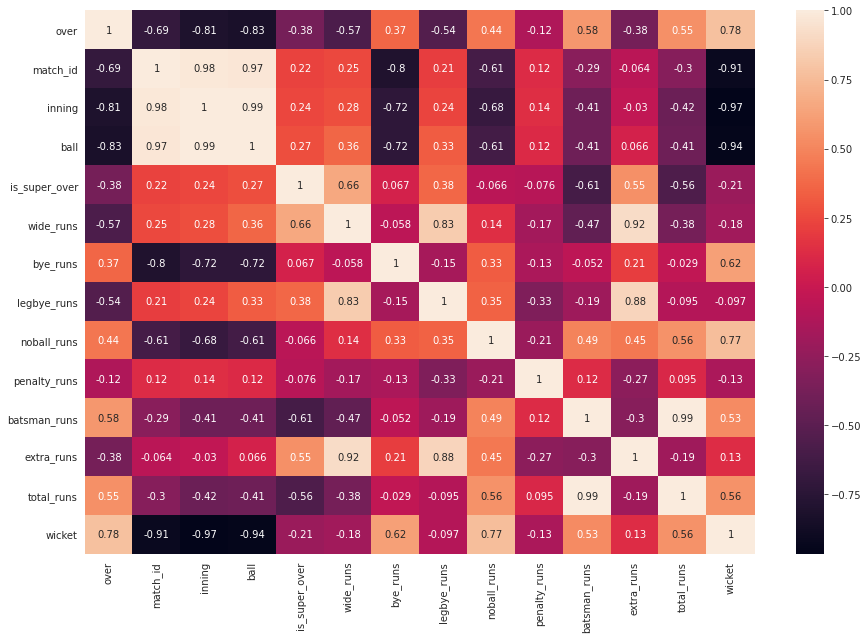

In [28]:
# using seaborn heatmap
corr = wicketper_over_df_1.corr()
# use annot for labeling because without it only the color will be visible 
sns.heatmap(corr,annot = True)

while looking at this heat map  we can see a high corelation between match_id, inings, balls


But match id ,innings ,ball are just for representation purpose ( *numerical values for better understanding and finding out detail of pertiular match*) they dont have any relation to the match  played so it would be better to remove all such columns.

In [29]:
# creating new dataframe without unwanted columns
wicketper_over_df = wicketper_over_df_1[['over',   'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 
       'batsman_runs', 'extra_runs', 'total_runs', 'wicket']]
wicketper_over_df.head(2)

,over,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,wicket
0,1,539,52,248,32,8535,871,9406,306.0
1,2,489,40,262,32,10139,823,10962,350.0


Now lets see and find out the co-relation in new data frame


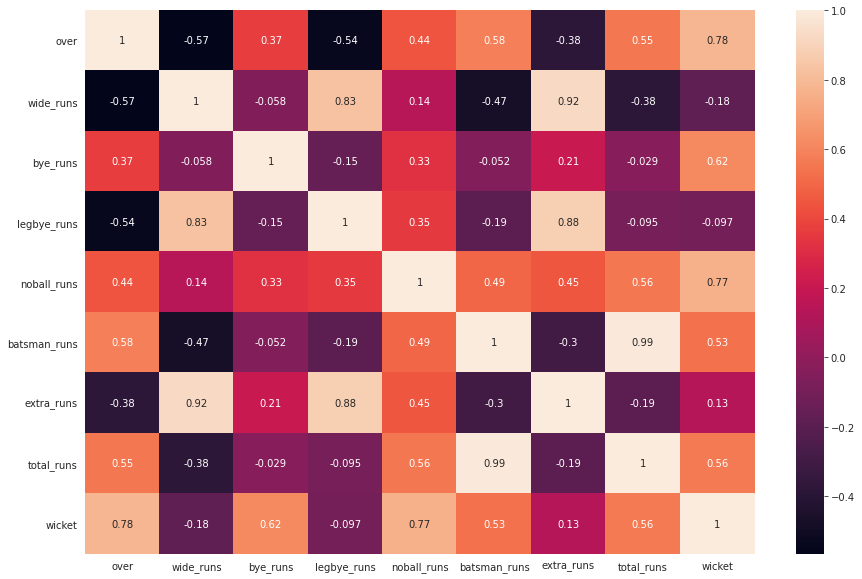

In [30]:
sns.heatmap(wicketper_over_df.corr(),annot = True)

we also see there are few columns which are highly co-related to each other such as 

*   extra_runs columns have postive co-relation with wide_runs, legbye_runs, bye_runs
*   wickets fall have a postive co-relation with over 



**Now lets explore these  co-realtion  with the help of other visualization tools for better understanding of co-relation**

Lets start by  creating some sub plots for side by side comparision of Total run scored and wickets fall with respect to each over 

Text(0.5, 1.0, 'No of wicket taken in each over in IPL')

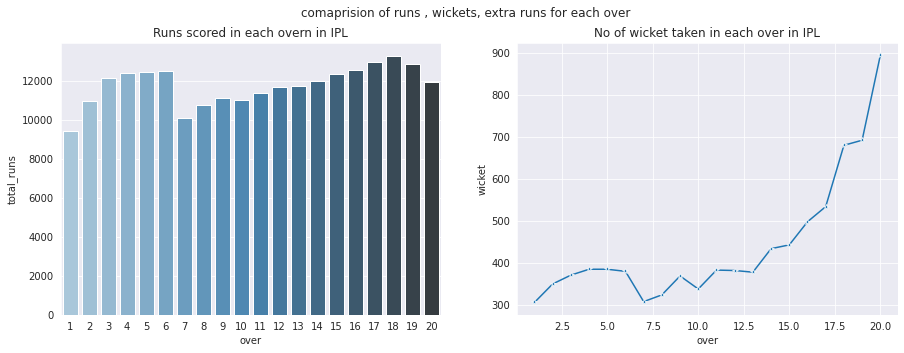

In [31]:
# setting background to dark grid for better visualization
# by using set style
sns.set_style("darkgrid")

# figuring out the layout of subplot
# using figsize to control the size of the subpolot
fig , axes= plt.subplots(1,2, figsize = (15,5))

# giving title to the subplot
fig.suptitle ('comaprision of runs , wickets, extra runs for each over')

# creating barplot for run scored in each over
# by providing axes =0 only as there is only one row in subplots 
sns.barplot(ax= axes[0],data = wicketper_over_df,x='over',y="total_runs",palette="Blues_d").set_title("Runs scored in each overn in IPL")

# creating scatter plot of wickiet fall in each over
sns.lineplot(ax= axes[1],data= wicketper_over_df,x="over",y="wicket",marker="*").set_title("No of wicket taken in each over in IPL")



By looking at these graphs we can conclude that   in process of scorring more runs at the end of innings teams also looses wickets.

*And this thing is true as we have seen in IPl, how team don't care about the wickets at end of innings they are more concern about runs*

***Lets have a look at how extra runs behave as inings progress in IPL***

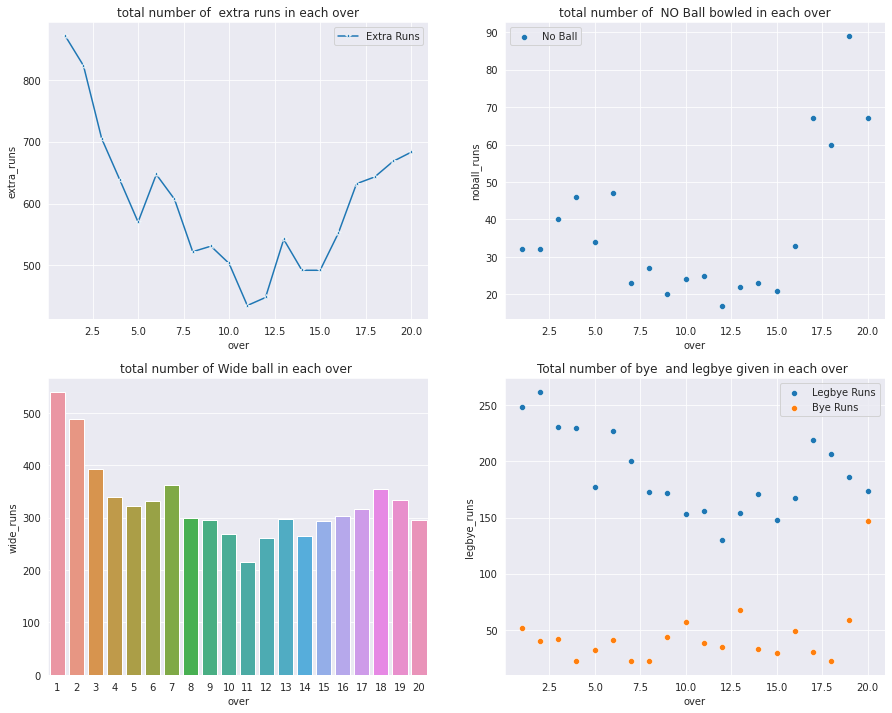

In [32]:
# setting the background
sns.set_style("darkgrid")

# figuring out the layout of subplots
fig ,axes= plt.subplots(2,2 ,figsize= (15,12))


sns.lineplot(ax=axes[0,0],data = wicketper_over_df,x="over",y="extra_runs",marker = "*",label="Extra Runs").set_title("total number of  extra runs in each over")
sns.scatterplot(ax =axes[0,1],data = wicketper_over_df,x="over",y= "noball_runs",legend="full",label ="No Ball").set_title("total number of  NO Ball bowled in each over")
sns.barplot(ax= axes[1,0],data = wicketper_over_df,x="over",y="wide_runs", label= "Wide Ball").set_title("total number of Wide ball in each over ")
sns.scatterplot(ax = axes[1,1],data = wicketper_over_df,x="over",y="legbye_runs",label ="Legbye Runs").set_title("Total number of bye  and legbye given in each over ")
sns.scatterplot(ax= axes[1,1], data = wicketper_over_df,x="over",y ="bye_runs",legend= "full",label ="Bye Runs")

# used legend to print legend box
plt.legend()
# 
# sns.scatterplot("over","batsman_runs", data = wicketper_over_df)

*its clearly visible in the graphs in first sub plot that bowler have given more extra in initial stage of the the match when at the end* 

By seeing all the graphs in subplot we notice one thing that majority part of extra is in form of wides and leg bye and that is true as in start of innings batsman and bowlers are more focused on judging the behaviour of pitch.   

If we look at **NO ball graph** we can see most of the no ball are bowled at end of the inngs so by this we can conclude that bowlers are **putting more efforts at end that could led to oversteping and hence no ball***

One more thing which we can see from these graphs is the major contributor to exta runs are wide balls and leg byes

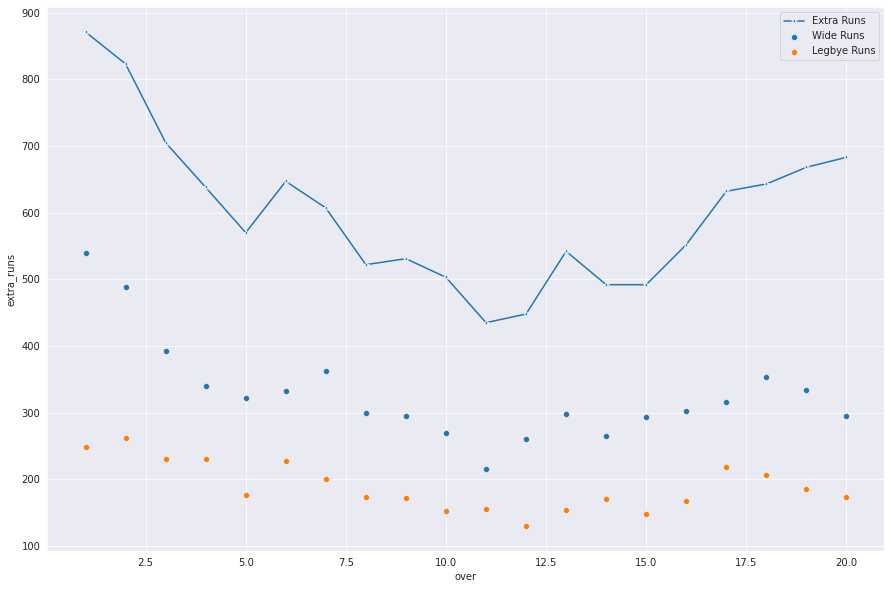

In [33]:
# creating a graphs to compare extra runs , wide and legbye
#creting line plot for extra runs
sns.lineplot(data=wicketper_over_df,x="over",y='extra_runs', marker="*",label ="Extra Runs")
# scatter plot for wide ball runs
sns.scatterplot(data=wicketper_over_df,x="over",y='wide_runs',label ="Wide Runs" )
#bar plot for leg bye runs
sns.scatterplot(data=wicketper_over_df,x="over",y='legbye_runs',label ="Legbye Runs")
# using legend for lagend box
plt.legend()


BY all  these graphs we can easily viasualize the relation between the extra runs and total 

# umpire data

Whenever we say there is match going on most of the people start searching for there favourite players .
beacuse they know that a perticular player can turn the match in its team favour at any time.
but players are not the only one which turn the matches as we have seen in IPL that there are many matches which turned  by the decision given by umpire  


Here i will tell u the most experienced umpire in the history of IPL 

In [127]:
# this gives us series  of  umpires indivisually 
# as there are 3 umpire in match 
umpire_1 = matches_df["umpire1"]
umpire_2 = matches_df["umpire2"]
umpire_3 = matches_df["umpire3"]

# concat these series row wise with axis=0
final_umpire = pd.concat([umpire_1,umpire_2,umpire_3])
umpire = final_umpire.value_counts().sort_values(ascending = False)
umpire = pd.DataFrame(umpire).reset_index()
umpire.rename(columns = {"index":"umpire_name",0:"total_matches"},inplace =True)

umpire.style.background_gradient()
umpire.head(5)


,umpire_name,total_matches
0,S Ravi,114
1,HDPK Dharmasena,87
2,C Shamshuddin,83
3,AK Chaudhary,58
4,SJA Taufel,55


This gives us that **S Ravi** is the most experienced umpire in histry of the IPL

Now with the help of bar plot we can see where does other umpire stand

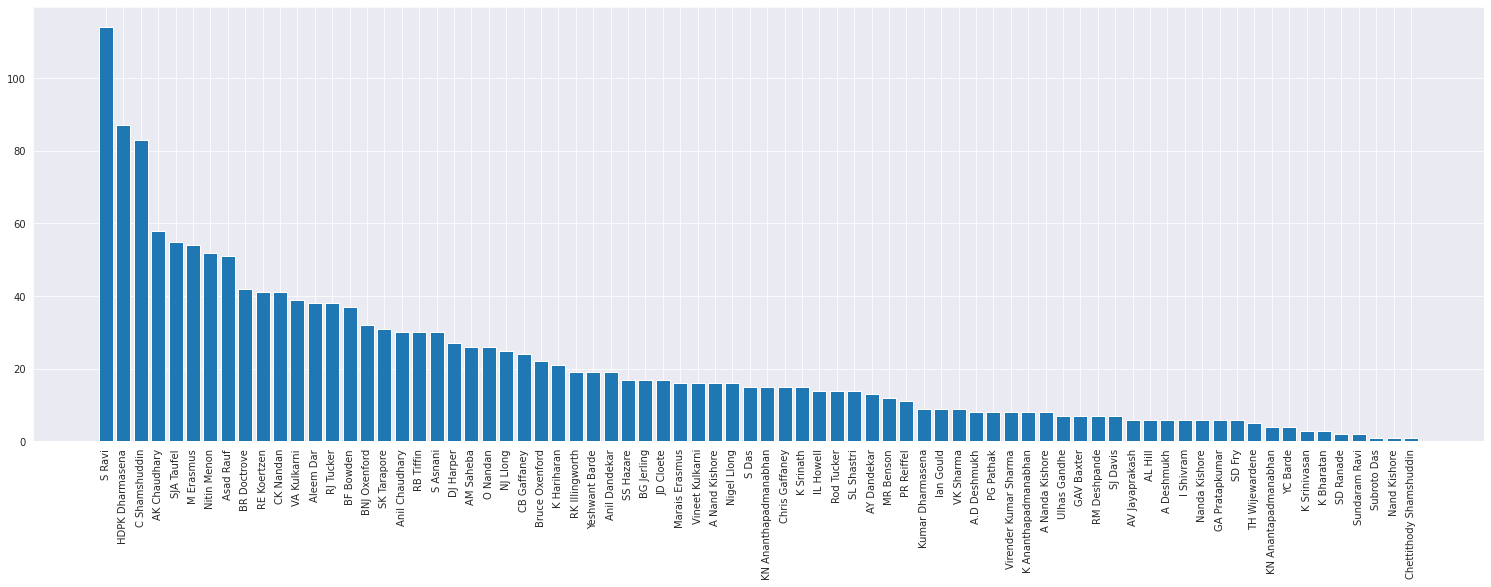

In [137]:
plt.bar(x=umpire["umpire_name"], height= umpire["total_matches"])
plt.xticks(umpire.index, rotation="vertical")
plt.rcParams['figure.figsize']=(24,8)

# by doing this will show only graph and not the additional things
plt.show()


In [95]:
umpire_df= matches_df[["umpire1","umpire2","umpire3"]].value_counts()
umpire_df

umpire1          umpire2                umpire3         
Nigel Llong      Anil Chaudhary         Vineet Kulkarni     3
S Ravi           Yeshwant Barde         O Nandan            3
Marais Erasmus   Nitin Menon            Yeshwant Barde      3
                 Anil Dandekar          Nitin Menon         2
S Ravi           Anil Dandekar          C Shamshuddin       2
                                                           ..
Nigel Llong      Ulhas Gandhe           Anil Chaudhary      1
                 Vineet Kulkarni        O Nandan            1
                 Virender Kumar Sharma  Anil Chaudhary      1
Nitin Menon      Anil Chaudhary         Kumar Dharmasena    1
A Nanda Kishore  Anil Chaudhary         Chris Gaffaney      1
Length: 99, dtype: int64

In [89]:
# ipl_season dataframe group by 
ipl_season

In [70]:
new_deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'Season'],
      dtype='object')

In [71]:
# lets start by grouping matches_df dataframe with season and th
ipl_df = new_deliveries_df.groupby("batting_team")

In [79]:
# start by finding dataframe from each season
l=[]
for seasons,seasons_df in ipl_df:
  # lets performe a groip by on seasons_df there by winner
  # find out the teams which have won max matches in each season
  # print(seasons_df)
  print(seasons)
  win_per_season = seasons_df.groupby("Season")
  for dic_1,dic_1_df in win_per_season:
    print(dic_1_df.columns)
  # print(win_per_season)
  # l.append(win_per_season)


Chennai Super Kings
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'Season'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'Season'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total

In [64]:
 first_df = l[0]

In [67]:
first_df.loc["Season"]

0    IPL-2017IPL-2017IPL-2017IPL-2017IPL-2017IPL-20...
Name: Season, dtype: object